# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import seaborn as sns
from sklearn import preprocessing, svm 
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities
#city = 'busselton'

['punta arenas',
 'kudahuvadhoo',
 'jamestown',
 'arraial do cabo',
 'gualdo tadino',
 'hobart',
 'port alfred',
 'mataura',
 'saint anthony',
 'yar-sale',
 'port hedland',
 'forio',
 'henties bay',
 'qaanaaq',
 'upernavik',
 'newtownards',
 'faya',
 'vagamo',
 'bandarbeyla',
 'takoradi',
 'amderma',
 'mindelo',
 'robertsport',
 'port hardy',
 'lagoa',
 'albany',
 'carnarvon',
 'hovd',
 'bambous virieux',
 'ahipara',
 'grafton',
 'ojinaga',
 'taoudenni',
 'haines junction',
 'tokur',
 'mehamn',
 'neiafu',
 'sao filipe',
 'taolanaro',
 'hermanus',
 'bambanglipuro',
 'saldanha',
 'zhangye',
 'saint-philippe',
 'hofn',
 'cape town',
 'sentyabrskiy',
 'ughelli',
 'leningradskiy',
 'makakilo city',
 'lebu',
 'port shepstone',
 'sitka',
 'nanortalik',
 'provideniya',
 'kruisfontein',
 'belushya guba',
 'atuona',
 'tuktoyaktuk',
 'ozark',
 'kungurtug',
 'silifke',
 'salinas',
 'sahuaripa',
 'vaini',
 'monrovia',
 'vorselaar',
 'rikitea',
 'hasaki',
 'manggar',
 'kamenka',
 'victoria',
 'georg

In [5]:
url= "http://api.openweathermap.org/data/2.5/weather?units=metric&"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="
#{city}

response= requests.get(query_url).json()
query_url

#pprint((response['weather']))





'http://api.openweathermap.org/data/2.5/weather?units=metric&appid=2dfbe960b9bc57c53258d6e300321eaf&q='

In [6]:
#city = 'london'
#query_url = f"{url}appid={weather_api_key}&q={city}"

#response= requests.get(query_url).json()
#query_url

#pprint((response['wind']['speed']))
#pprint((response['main']['humidity']))
#pprint((response['main']['temp']))
#pprint((response['clouds']['all']))


In [7]:
# Loop through the list of cities and perform a request for data on each
windSpeeds = []
humidities=[]
temps=[]
cloudsperc=[]
lat = []
temp_maxs =[]
lon =[]

cities_found=[]
#cityName=[]
counter= 0
for city in cities:
    response = requests.get(query_url + city).json()
    counter+=1
    try:
        cities_found.append(city)
        windSpeeds.append(response['wind']['speed'])
        humidities.append(response['main']['humidity'])
        temps.append(response['main']['temp'])
        cloudsperc.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_maxs.append(response['main']['temp_max'])
        #print(f'wind speed:{windSpeeds}, humidity%:{humidities}, temperature:{temps}, cloud%:{cloudsperc}, city:{city}, lat:{lat}')
        #print(response['weather'])
        print(f'processing record: {counter}')
    except KeyError:
        #print('something missing')
        pass

    
#pprint(f'wind speed:{windSpeeds}, humidity%:{humidities}, temperature:{temps}, cloud%:{cloudsperc}')

processing record: 1
processing record: 2
processing record: 3
processing record: 4
processing record: 5
processing record: 6
processing record: 7
processing record: 8
processing record: 9
processing record: 10
processing record: 11
processing record: 12
processing record: 13
processing record: 14
processing record: 15
processing record: 16
processing record: 17
processing record: 18
processing record: 19
processing record: 20
processing record: 22
processing record: 23
processing record: 24
processing record: 25
processing record: 26
processing record: 27
processing record: 28
processing record: 29
processing record: 30
processing record: 31
processing record: 32
processing record: 33
processing record: 34
processing record: 35
processing record: 36
processing record: 37
processing record: 38
processing record: 40
processing record: 41
processing record: 42
processing record: 43
processing record: 44
processing record: 45
processing record: 46
processing record: 48
processing record: 

processing record: 396
processing record: 397
processing record: 398
processing record: 399
processing record: 400
processing record: 401
processing record: 402
processing record: 403
processing record: 404
processing record: 405
processing record: 406
processing record: 407
processing record: 408
processing record: 409
processing record: 410
processing record: 411
processing record: 412
processing record: 413
processing record: 414
processing record: 415
processing record: 416
processing record: 417
processing record: 418
processing record: 419
processing record: 420
processing record: 421
processing record: 422
processing record: 423
processing record: 424
processing record: 425
processing record: 426
processing record: 427
processing record: 428
processing record: 429
processing record: 430
processing record: 431
processing record: 432
processing record: 434
processing record: 435
processing record: 436
processing record: 437
processing record: 438
processing record: 439
processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
list_of_tuples = list(zip( cities_found, windSpeeds, humidities, temps, cloudsperc, lat, lon, temp_maxs ))
list_of_tuples

data_df = pd.DataFrame(list_of_tuples, columns = ['city','Wind Speed', 'Humidity', 'Temperature(c)', 'Percentage of Cloud','Latitude','Longitude','Max Temperatures(c)' ])

data_df

,city,Wind Speed,Humidity,Temperature(c),Percentage of Cloud,Latitude,Longitude,Max Temperatures(c)
0,punta arenas,3.10,83,1.00,99,-53.15,-70.92,1.00
1,kudahuvadhoo,6.19,79,29.07,94,2.67,72.89,29.07
2,jamestown,1.50,47,14.00,1,42.10,-79.24,14.00
3,arraial do cabo,4.58,73,21.75,16,-22.97,-42.03,21.75
4,gualdo tadino,2.41,64,7.36,0,43.23,12.78,9.44
...,...,...,...,...,...,...,...,...
577,djougou,1.72,91,10.07,73,59.20,38.84,10.07
578,vila,4.00,87,13.33,85,55.75,38.00,14.00
579,tukrah,6.14,83,27.48,85,9.44,-78.59,27.48
580,angra,2.24,49,12.22,0,44.18,16.36,12.22


In [28]:
cities
cities_df = pd.DataFrame(cities, columns=["cities"])
cities_df.to_csv('list.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
mask_humidity = (data_df['Humidity']<= 100)
filteredHumidity = data_df[mask_humidity]
filteredHumidity


,city,Wind Speed,Humidity,Temperature(c),Percentage of Cloud,Latitude,Longitude,Max Temperatures(c)
0,punta arenas,3.10,83,1.00,99,-53.15,-70.92,1.00
1,kudahuvadhoo,6.19,79,29.07,94,2.67,72.89,29.07
2,jamestown,1.50,47,14.00,1,42.10,-79.24,14.00
3,arraial do cabo,4.58,73,21.75,16,-22.97,-42.03,21.75
4,gualdo tadino,2.41,64,7.36,0,43.23,12.78,9.44
...,...,...,...,...,...,...,...,...
577,djougou,1.72,91,10.07,73,59.20,38.84,10.07
578,vila,4.00,87,13.33,85,55.75,38.00,14.00
579,tukrah,6.14,83,27.48,85,9.44,-78.59,27.48
580,angra,2.24,49,12.22,0,44.18,16.36,12.22


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [30]:
# Extract relevant fields from the data frame

filteredHumidity.to_csv('cleanCity2.csv', index=False)
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

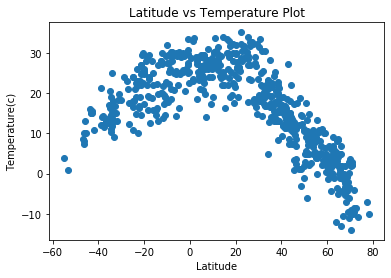

<Figure size 432x288 with 0 Axes>

In [65]:
xax= filteredHumidity['Latitude']
yax= filteredHumidity['Temperature(c)']
plt.scatter(xax,yax)
plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature(c)')
plt.show()
plt.savefig('LatitudeVsTemperature.png')



In [ ]:
#Explanation
    #xax variable captured the latitudes of cities, yax captured the longitudes. The axis of the graph were labeled and Titled.
    #The scatter plot proves the trend that at distances further away in latitude from the equator(located at x-axis=0), Temperatures are lower
    #cities near the equator(latitude 0) tend to be hot.

## Latitude vs. Humidity Plot

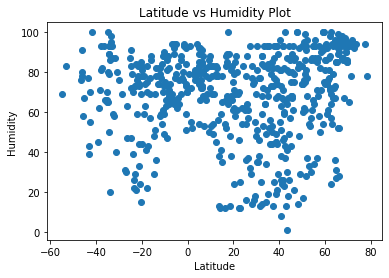

<Figure size 432x288 with 0 Axes>

In [66]:
humid_y=filteredHumidity[['Humidity']]
plt.scatter(xax, humid_y)
plt.title('Latitude vs Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('LatitudeVsHumidity.png')

In [ ]:
#Explanation
    #All the cities with latitudes of 0 that were close to the equator tended to have high humidities.
    #cities further away from the equator tended to have a wider range of humidity.
    #This made sense because: (1) equatorial cities are hot, therefore there is more opportunity for water bodies to be evaporated into the atmosphere
                            #(2)temperature is not the only factor that affects humidity. At higher or lower latitudes, other factors could have affected humidity

## Latitude vs. Cloudiness Plot

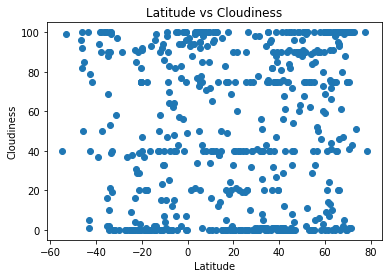

<Figure size 432x288 with 0 Axes>

In [67]:
cloud_y=filteredHumidity[['Percentage of Cloud']]
plt.scatter(xax, cloud_y)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('LatitudeVsCloudiness.png')

In [ ]:
#Explanation
    #There is no correlation between latitude and cloudiness. The points on the scattered plots are random and unpredictable

## Latitude vs. Wind Speed Plot

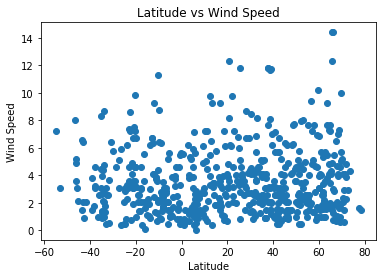

<Figure size 432x288 with 0 Axes>

In [68]:
wspeed_y = filteredHumidity[['Wind Speed']]
plt.scatter(xax, wspeed_y)
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('LatitudeVsWindspeed.png')

In [ ]:
#explanation
    # There is no Identified pattern or correlation between windspeed and Latitude

## Linear Regression

In [59]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(xax,yax):
    (slope, intercept, rvalue,pvalue, stderr) = linregress(xax, yax)
    regress_values = xax * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xax,yax)
    plt.plot(xax,regress_values,"r-")
    #plt.annotate(line_eq,(x,y),fontsize=12,color="blue")

In [36]:
# Create Northern and Southern Hemisphere DataFrames
mask_north = (filteredHumidity['Latitude']>= 0)
north_df =filteredHumidity[mask_north]
north_df


,city,Wind Speed,Humidity,Temperature(c),Percentage of Cloud,Latitude,Longitude,Max Temperatures(c)
1,kudahuvadhoo,6.19,79,29.07,94,2.67,72.89,29.07
2,jamestown,1.50,47,14.00,1,42.10,-79.24,14.00
4,gualdo tadino,2.41,64,7.36,0,43.23,12.78,9.44
8,saint anthony,3.10,43,10.26,1,45.02,-93.22,11.11
9,yar-sale,5.51,93,-10.46,61,66.83,70.83,-10.46
...,...,...,...,...,...,...,...,...
577,djougou,1.72,91,10.07,73,59.20,38.84,10.07
578,vila,4.00,87,13.33,85,55.75,38.00,14.00
579,tukrah,6.14,83,27.48,85,9.44,-78.59,27.48
580,angra,2.24,49,12.22,0,44.18,16.36,12.22


In [37]:
mask_south = (filteredHumidity['Latitude']<= 0)
south_df =filteredHumidity[mask_south]
south_df


,city,Wind Speed,Humidity,Temperature(c),Percentage of Cloud,Latitude,Longitude,Max Temperatures(c)
0,punta arenas,3.10,83,1.00,99,-53.15,-70.92,1.00
3,arraial do cabo,4.58,73,21.75,16,-22.97,-42.03,21.75
5,hobart,2.10,55,15.70,40,-42.88,147.33,16.00
6,port alfred,1.79,98,15.00,99,-33.59,26.89,15.00
7,mataura,3.57,91,7.48,100,-46.19,168.86,7.48
...,...,...,...,...,...,...,...,...
560,shache,4.10,82,20.00,58,-12.04,-77.03,20.00
561,qandala,3.03,22,19.18,0,-17.88,15.07,19.18
572,zhigansk,1.60,65,29.79,64,-8.12,111.89,29.79
574,laharpur,1.42,41,15.89,1,-18.37,21.85,15.89


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

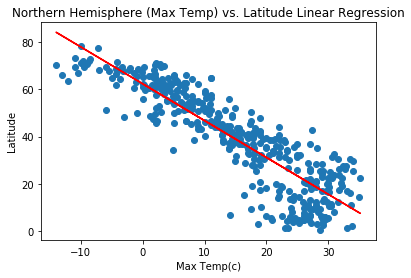

In [78]:
linearregression(north_df['Max Temperatures(c)'],north_df['Latitude'])

plt.xlabel("Max Temp(c)")
plt.ylabel("Latitude")
#plt.show
plt.title('Northern Hemisphere (Max Temp) vs. Latitude Linear Regression')
plt.savefig('Nort_Hemisphere_TempVS_LLR.png')

In [ ]:
There

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

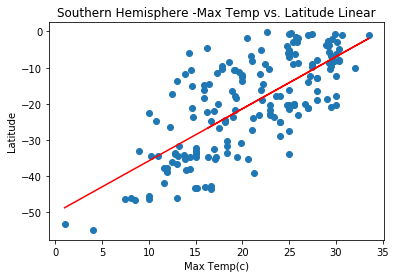

In [80]:
linearregression(south_df['Max Temperatures(c)'],south_df['Latitude'])
#plt.annotate(line_eq,(24,-50),fontsize=10,color="blue")
plt.xlabel("Max Temp(c)")
plt.ylabel("Latitude")
#plt.show
plt.title('Southern Hemisphere -Max Temp vs. Latitude Linear')
plt.savefig('Sout_Hemisphere_TempVS_LLR.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

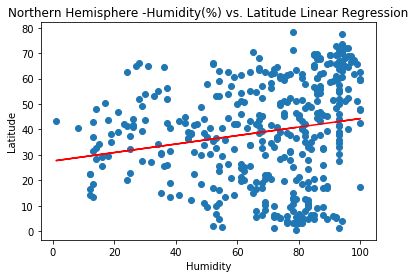

In [81]:
linearregression(north_df['Humidity'],north_df['Latitude'])
#plt.annotate(line_eq,(-18,10),fontsize=10,color="blue")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
#plt.show
plt.title('Northern Hemisphere -Humidity(%) vs. Latitude Linear Regression')
plt.savefig('Nort_Hemisphere_humVS_LLR.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

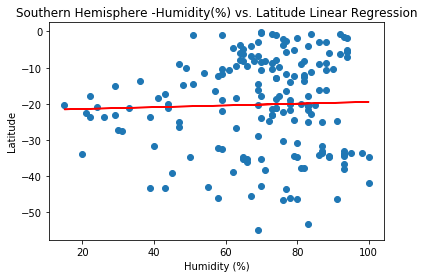

In [82]:
linearregression(south_df['Humidity'],south_df['Latitude'])
#plt.annotate(line_eq,(-18,10),fontsize=10,color="blue")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
#plt.show
plt.title('Southern Hemisphere -Humidity(%) vs. Latitude Linear Regression')
plt.savefig('Sout_Hemisphere_humVS_LLR.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

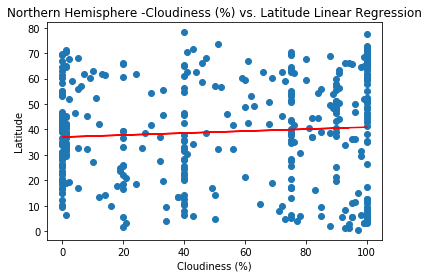

In [83]:
linearregression(north_df['Percentage of Cloud'],north_df['Latitude'])
#plt.annotate(line_eq,(-18,10),fontsize=10,color="blue")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
#plt.show
plt.title('Northern Hemisphere -Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('Nort_Hemisphere_CloudVS_LLR.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

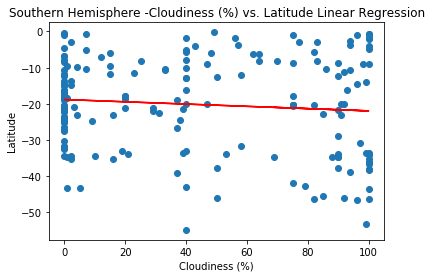

In [84]:
linearregression(south_df['Percentage of Cloud'],south_df['Latitude'])
#plt.annotate(line_eq,(-18,10),fontsize=10,color="blue")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
#plt.show
plt.title('Southern Hemisphere -Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('Sout_Hemisphere_CloudVS_LLR.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

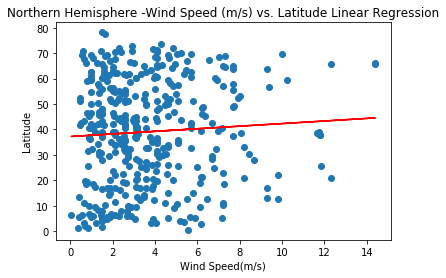

In [85]:
linearregression(north_df['Wind Speed'],north_df['Latitude'])
#plt.annotate(line_eq,(-18,10),fontsize=10,color="blue")
plt.xlabel("Wind Speed(m/s)")
plt.ylabel("Latitude")
#plt.show
plt.title('Northern Hemisphere -Wind Speed (m/s) vs. Latitude Linear Regression')
plt.savefig('Nort_Hemisphere_WindVS_LLR.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

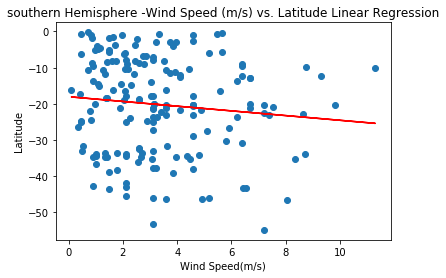

In [86]:
linearregression(south_df['Wind Speed'],south_df['Latitude'])
#plt.annotate(line_eq,(-18,10),fontsize=10,color="blue")
plt.xlabel("Wind Speed(m/s)")
plt.ylabel("Latitude")
#plt.show
plt.title('southern Hemisphere -Wind Speed (m/s) vs. Latitude Linear Regression')
plt.savefig('Sout_Hemisphere_WindVS_LLR.png')

In [ ]:
#Final Observations
# From the graph of Northern hemisphere Temperature vs Latitude linear regression, I realised that there was a strong correlation
# between latitude and Temperature. Higher temperatures of data were located at latitudes closer to zero

#The "Southern Hemisphere - Max Temp vs. Latitude Linear Regression" also showed a similar trend and the first observation.
#At latitudes closer to zero, temperatures were higher. The correlation wasnt as strong as for the northern hemisphere.

#Every other graph of regression lines showedd zero relationship between independet and dependet variables. This was signified
# by a wide spread of data on the scatter plots(i.e fewer points were located close to the line of best fit).
